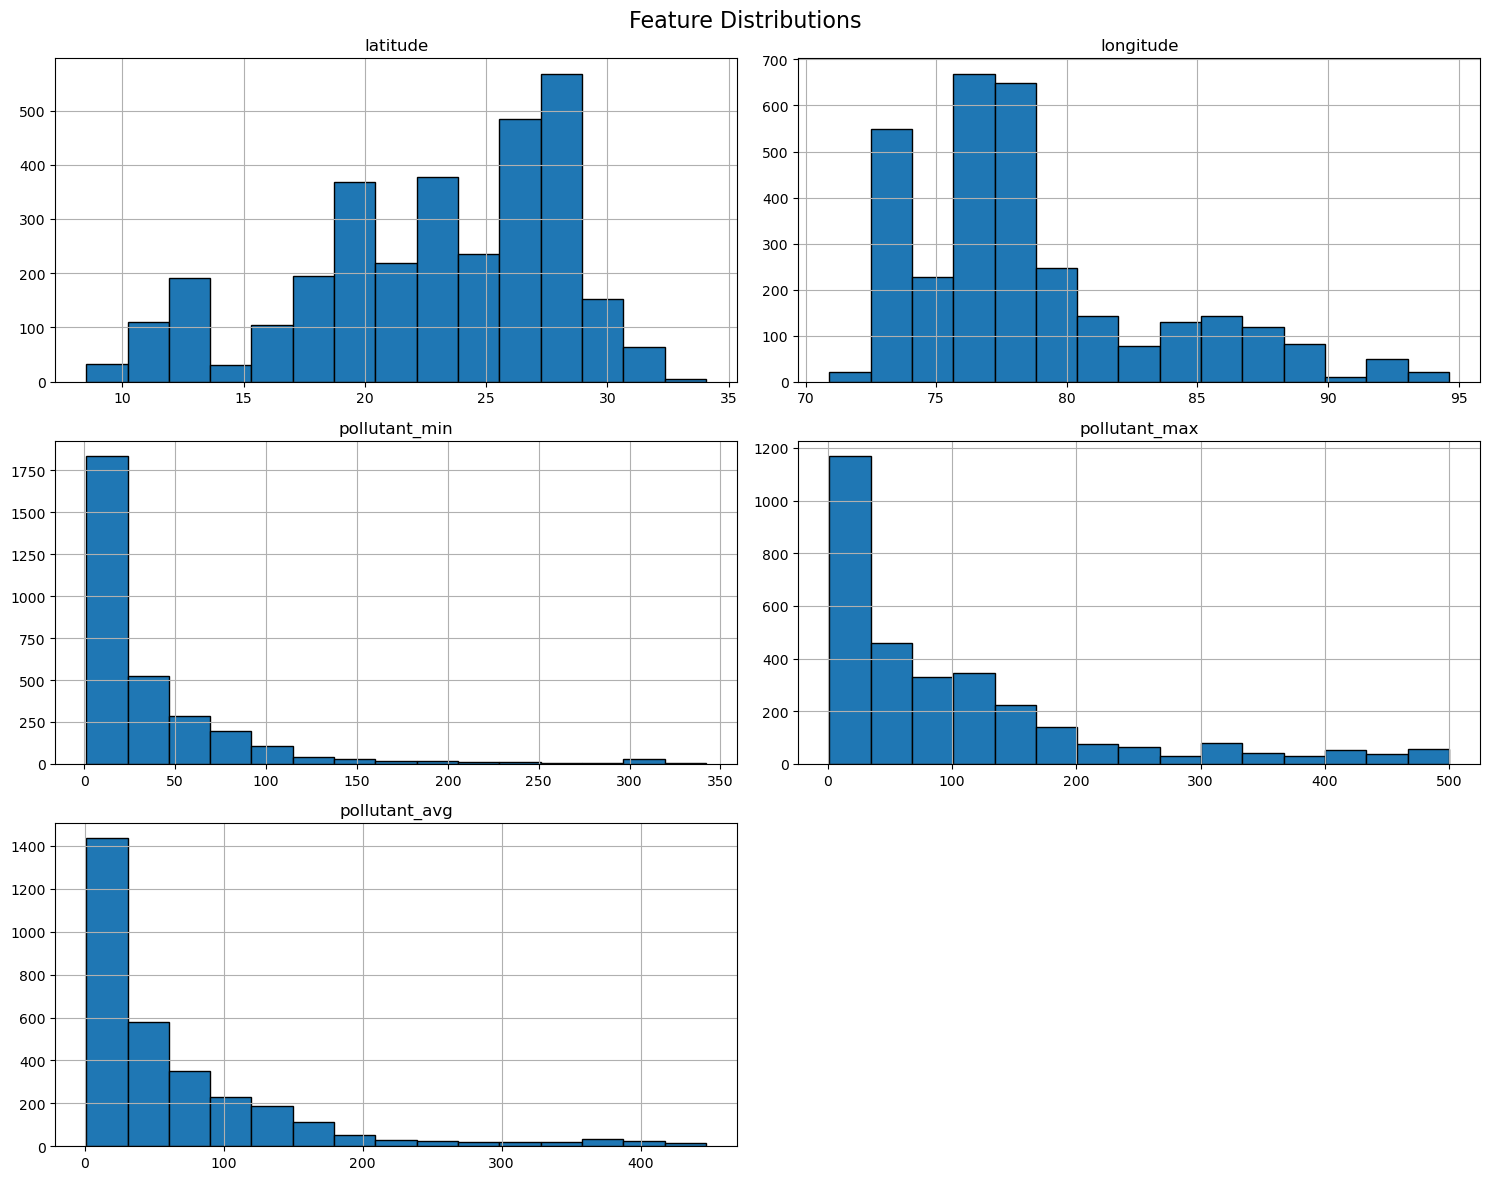

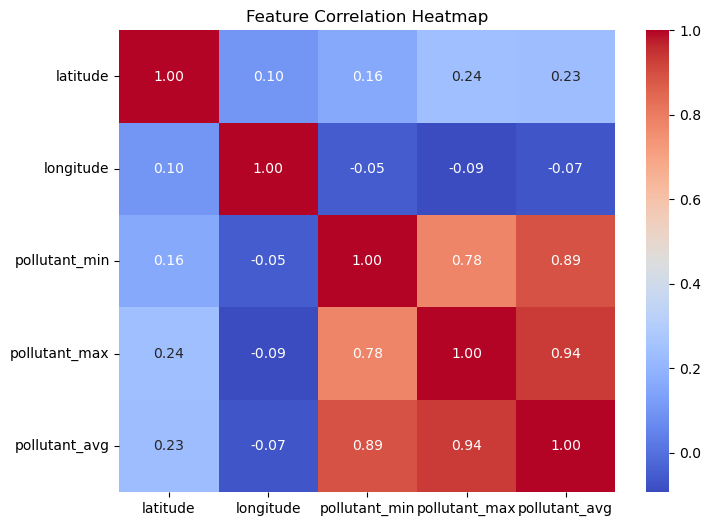

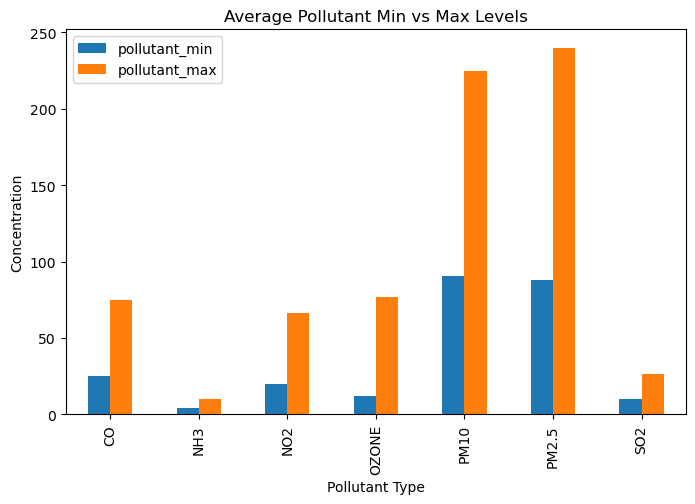

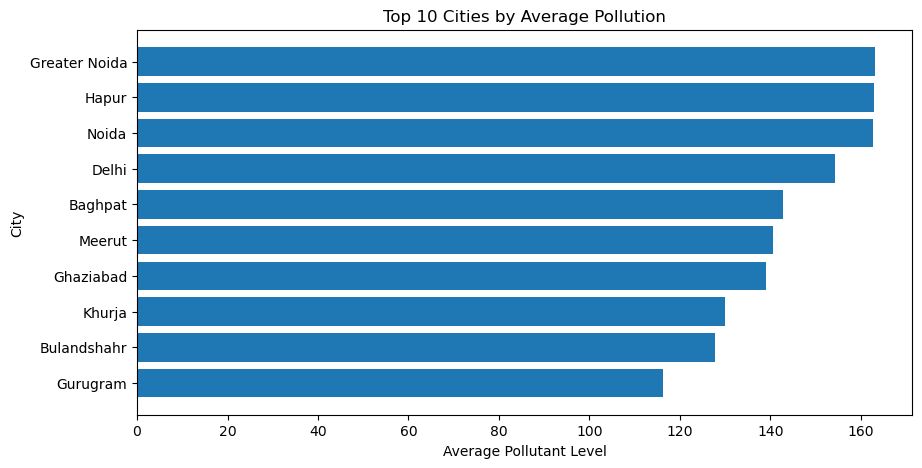

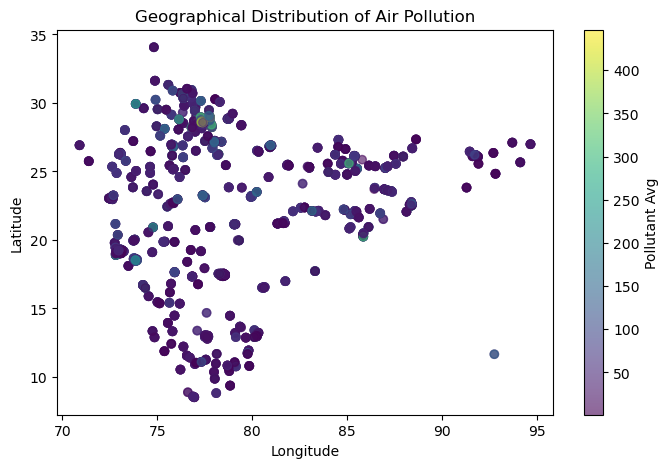

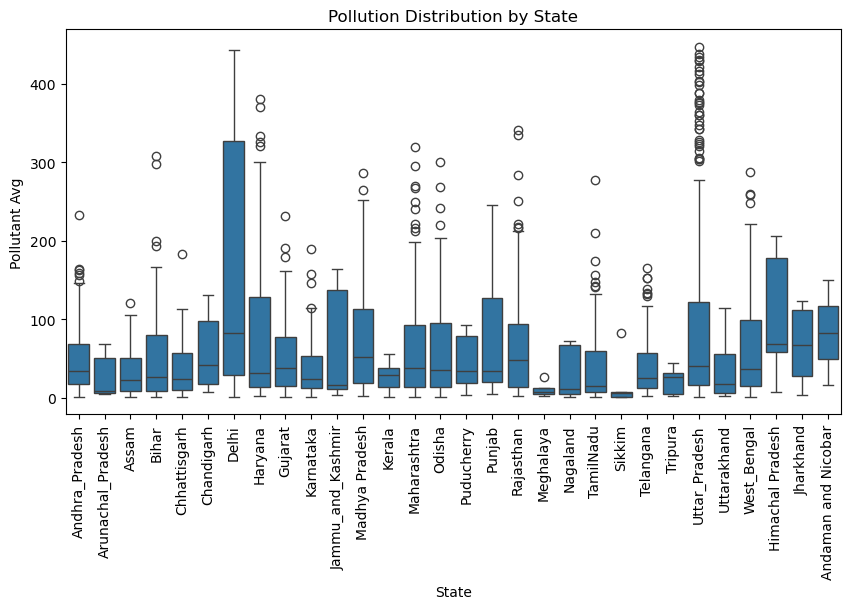

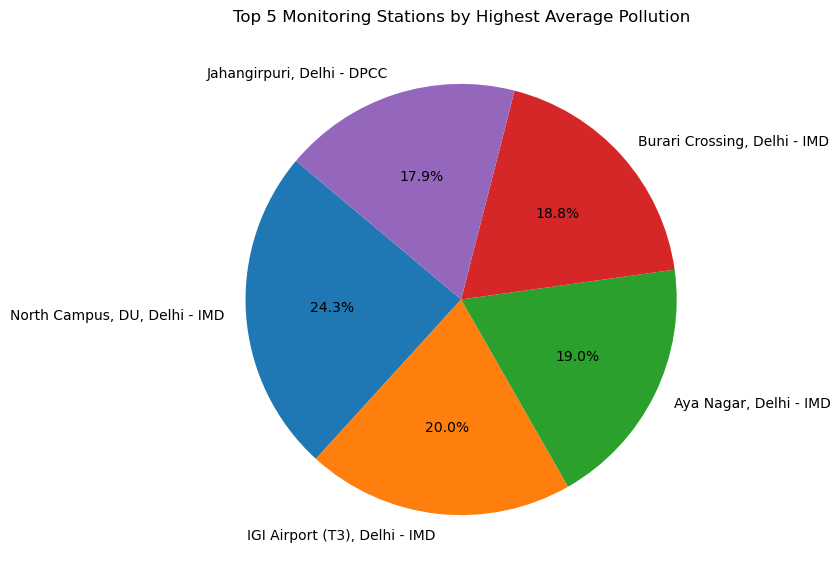

RMSE: 13.663
R2 Score: 0.973


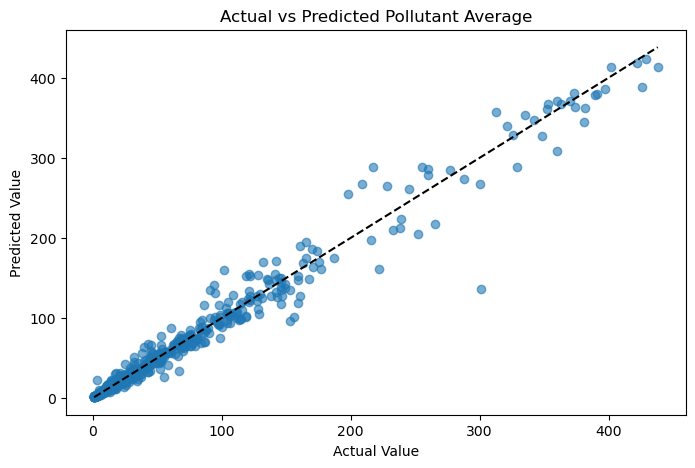

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Load Dataset
df = pd.read_csv(r"C:\Users\amrit\OneDrive\Desktop\data set for project\REAL TIME AIR QUALITY FROM VARIOUS LOCATION.csv")
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df = df.dropna(subset=["pollutant_avg"])
#Exploratory Data Analysis
numeric_features = [
    "latitude",
    "longitude",
    "pollutant_min",
    "pollutant_max",
    "pollutant_avg"
]

df[numeric_features].hist(
    figsize=(15, 12),
    bins=15,
    edgecolor="black"
)

plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()
#Correlation Analysis
corr = df[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Average pollutant range by pollutant type
pollutant_range = (
    df.groupby("pollutant_id")[["pollutant_min", "pollutant_max"]]
    .mean()
)

pollutant_range.plot(kind="bar", figsize=(8, 5))
plt.title("Average Pollutant Min vs Max Levels")
plt.xlabel("Pollutant Type")
plt.ylabel("Concentration")
plt.show()
# Top 10 polluted cities
top_cities = (
    df.groupby("city")["pollutant_avg"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(top_cities.index, top_cities.values)
plt.gca().invert_yaxis()
plt.title("Top 10 Cities by Average Pollution")
plt.xlabel("Average Pollutant Level")
plt.ylabel("City")
plt.show()
#Geographical distribution by pollutant_avg
plt.figure(figsize=(8, 5))
plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["pollutant_avg"],
    alpha=0.6
)

plt.colorbar(label="Pollutant Avg")
plt.title("Geographical Distribution of Air Pollution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
#Pollution by state
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="state", y="pollutant_avg")
plt.xticks(rotation=90)
plt.title("Pollution Distribution by State")
plt.xlabel("State")
plt.ylabel("Pollutant Avg")
plt.show()
#Top Monitoring Stationsby pollutant_avg
top_stations_pollution = (
    df.groupby("station")["pollutant_avg"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(7, 7))
plt.pie(
    top_stations_pollution.values,
    labels=top_stations_pollution.index,
    autopct="%1.1f%%",
    startangle=140
)

plt.title("Top 5 Monitoring Stations by Highest Average Pollution")
plt.show()

#Predictive Modeling
y = df["pollutant_avg"]

X = df[
    [
        "country",
        "state",
        "city",
        "station",
        "latitude",
        "longitude",
        "pollutant_id",
        "pollutant_min",
        "pollutant_max"
    ]
]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", round(rmse, 3))
print("R2 Score:", round(r2, 3))
# Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.title("Actual vs Predicted Pollutant Average")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()
plt.close("all")